In [1]:

class Perceptron_class(object):
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        return 1 if x >= 0 else 0
 
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sb


In [3]:
X = load_iris()
index_row=[]
for i in range(X.data.shape[0]):
    if X.target[i]==2 or X.target[i]==1:
        index_row.append(i)
d = X['target'][index_row]
data=X.data[index_row]
perceptron = Perceptron_class(input_size=2)
perceptron.fit(data[:,[2,3]], d)
print(perceptron.W)

[ 5000. 27760. 10130.]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, d, test_size=0.3)

In [5]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [8]:
y_pred = ppn.predict(X_test_std)

In [9]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.97


In [10]:
#working on Big Mart Sales Data to predict the Item_fat_content of the dataset

In [11]:
filename='clean_bmart.csv'
data=pd.read_csv(filename)
data.head(10)

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


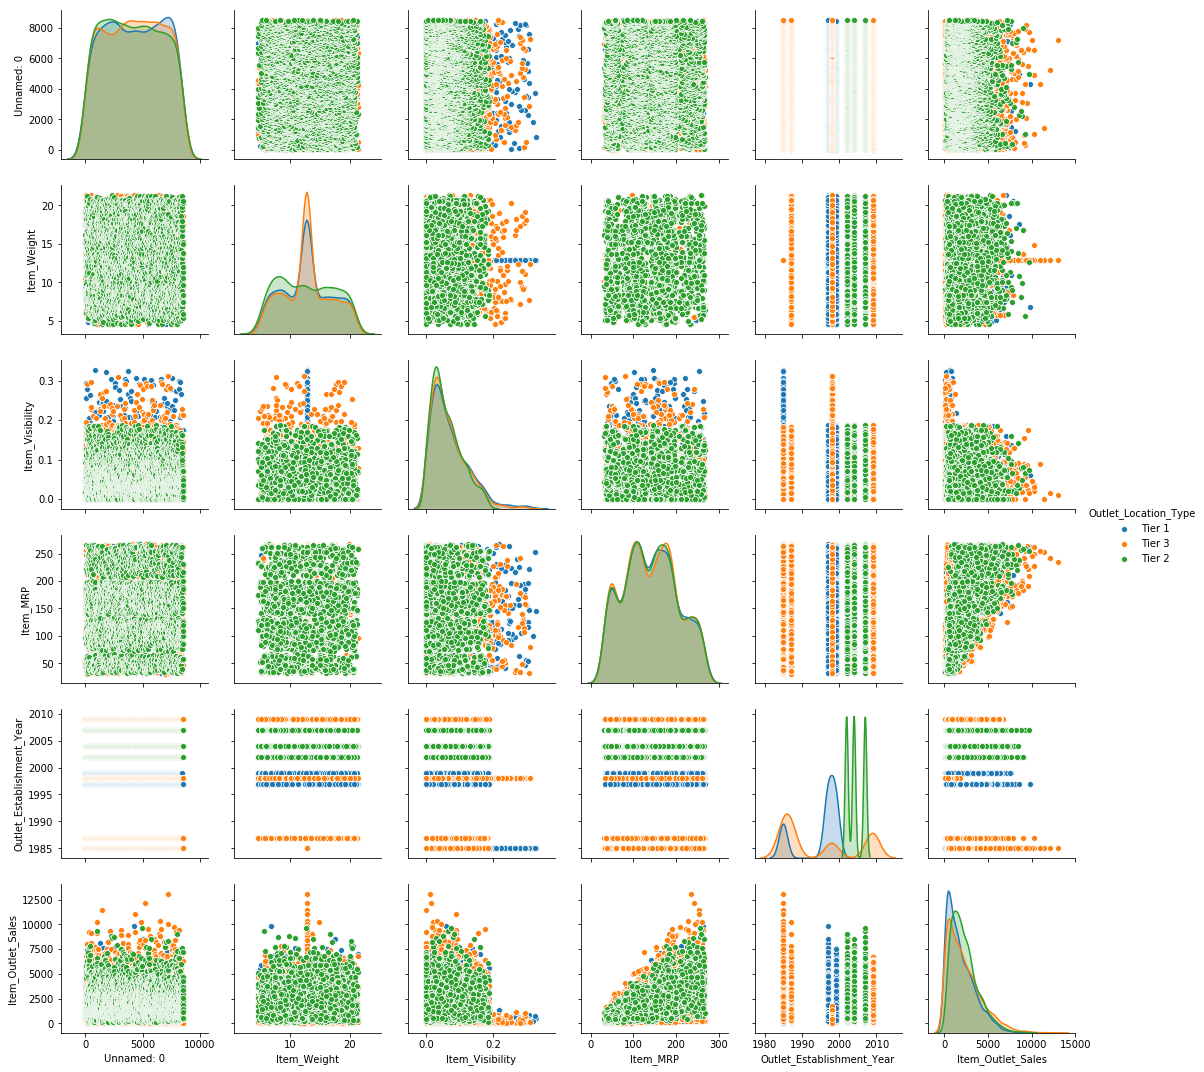

In [12]:
sb.pairplot(data=data,hue='Outlet_Location_Type')

In [13]:
X=data.loc[(data['Outlet_Location_Type']=='Tier 1')|(data['Outlet_Location_Type']=='Tier 2')]

y=X.values[:,10]


In [14]:
print(y)

['Tier 1' 'Tier 1' 'Tier 2' ... 'Tier 2' 'Tier 2' 'Tier 1']


In [15]:
le=[]
ley=LabelEncoder()
ley.fit(y)
x=X.values[:,[4,8]]

for i in range(x.shape[1]):
    le.append(LabelEncoder())
for i in range(x.shape[1]):
    le[i].fit(x[:,i])
    x[:,i]=le[i].transform(x[:,i])
y=ley.transform(y)
print(y)
print(X.columns.values[[4,8,10]])

[0 0 1 ... 1 1 0]
['Item_Visibility' 'Outlet_Establishment_Year' 'Outlet_Location_Type']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
ppn = Perceptron(n_iter=10000, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=10000, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [17]:
y_pred = ppn.predict(X_test)

In [18]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.90
